# Predicting Wine Quality
***

![title](wine.jpg)

## Introduction:

The following notebook contains two datasets of wines. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)


The purpose of this project was to do preliminary exploration of wine data, with a goal of selecting right attributes for classifying wine into one of the quality categories: poor, normal and excellent.

## Objectives:

1. Perform data cleaning on the dataset
2. Make a EDA report 
3. Visualize the distributions of various features and    correlations between them
4. Feature engineering to extract the correct features for the model
5. Build a classification or regression model to predict the wine quality index

## Dataset:

The dataset is in the form of a csv file and the link to download is given below:
https://drive.google.com/file/d/1pW85WoyJnWyLo8FlNEL4UDtkvoaxFI1Z/view?usp=sharing\

## Dataset Description:

The dataset contains 6498 rows and 14 columns
#### Input variables (based on physicochemical tests): 
- fixed acidity 
- volatile acidity 
- citric acid 
- residual sugar 
- chlorides 
- free sulfur dioxide 
- total sulfur dioxide 
- density 
- pH 
- sulphates 
- alcohol 
#### Output variable (based on sensory data): 
- quality (score between 0 and 10)
- good(1/0)
-Color(red/white)

## Data Exploration:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [74]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [75]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [76]:
data.shape

(6497, 14)

In [77]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,NaN


### Observation:

Nothing looks particularly out of place (e.g. no negative values in pH). Interestingly, no wines scored below a 3 or above a 9 (no perfect 10/10 scores).

In [81]:
n = data.shape[0]
quality_above_6 = data.loc[(data['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]
quality_below_5 = data.loc[(data['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]
quality_between_5 = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]
print("Total number of wine data: {}".format(n))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))

Total number of wine data: 6497
Wines with rating 7 and above: 1277
Wines with rating less than 5: 246
Wines with rating 5 and 6: 4974


### Missing Values

In [82]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
good                    False
color                   False
dtype: bool

### Observation

1. The summary of Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
2. All the data seems to be in range with different scales.
3. The wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.
4. It seems that data has been collected neatly or prior cleaning has been performed before publishing the dataset.

In [83]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

## EDA: Exploratory Data Analysis

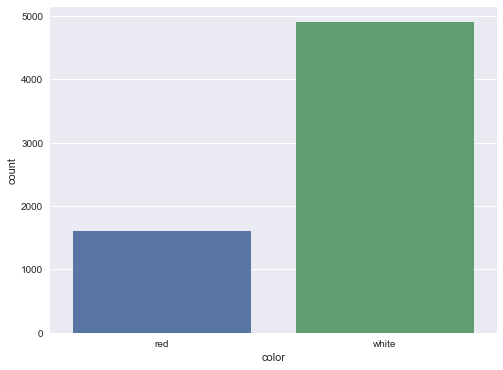

In [84]:
sns.countplot("color",data=data)
plt.show()

#### Observation:
This graph shows count of the two different wine. 

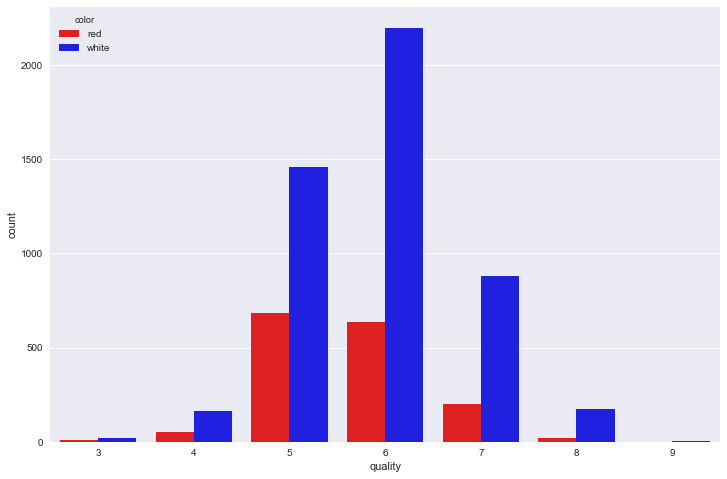

In [85]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='quality',hue='color',data=data,palette=dict(red = 'r', white = 'b'))

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

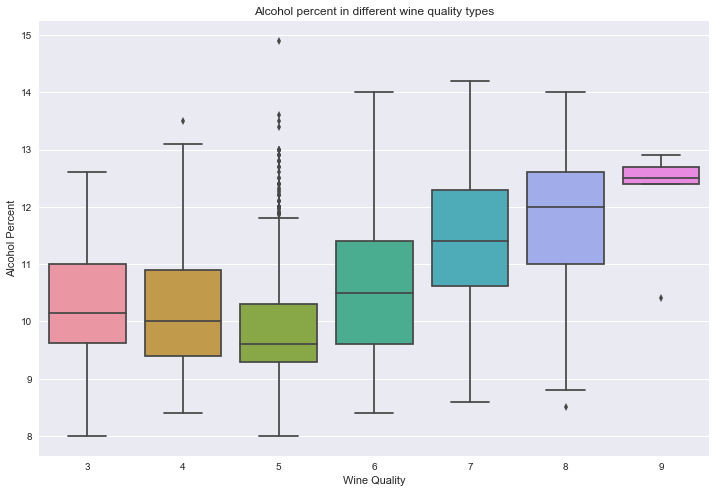

In [86]:
bx = sns.boxplot(x="quality", y='alcohol', data = data)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Sulphates in different wine quality types')]

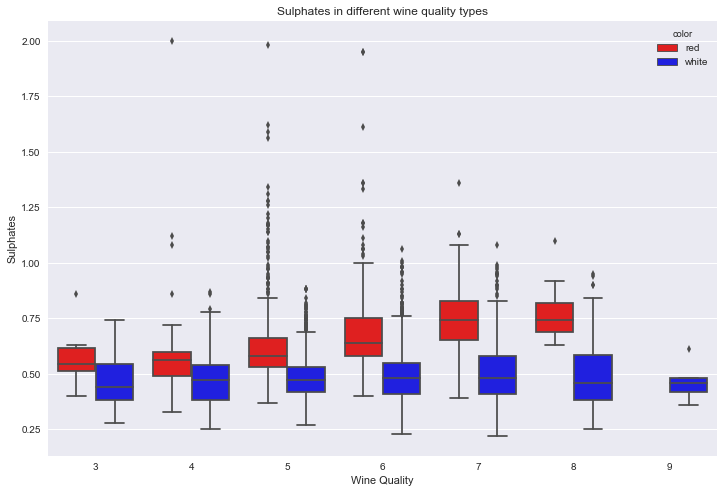

In [87]:
bx = sns.boxplot(x="quality", y='sulphates',hue='color', data = data,palette=dict(red = 'r', white = 'b'))
bx.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates in different wine quality types')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Citric_acid in different qualities of wine')]

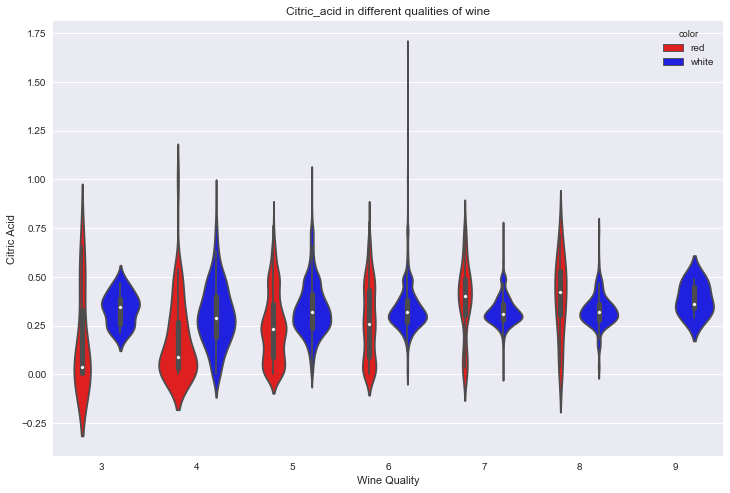

In [88]:
bx = sns.violinplot(x="quality", y='citric acid',hue='color', data = data,palette=dict(red = 'r', white = 'b'))
bx.set(xlabel='Wine Quality', ylabel='Citric Acid', title='Citric_acid in different qualities of wine')

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'pH in different quality of wines')]

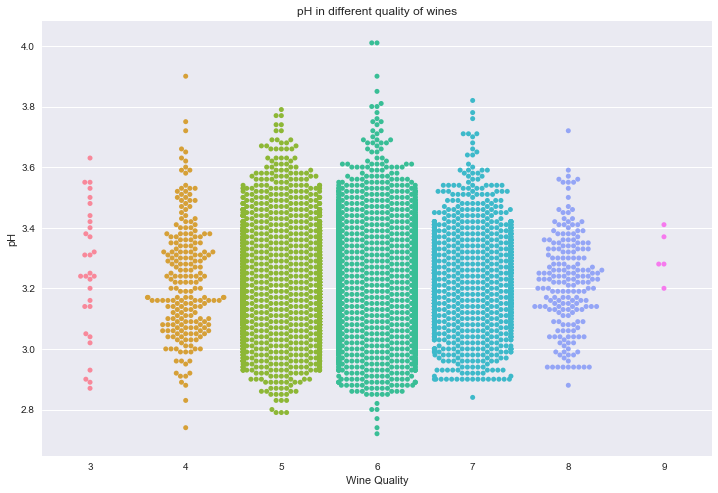

In [89]:
bx = sns.swarmplot(x="quality", y="pH", data = data);
bx.set(xlabel='Wine Quality', ylabel='pH', title='pH in different quality of wines')

## Visualize Distributions and Correlation of Features

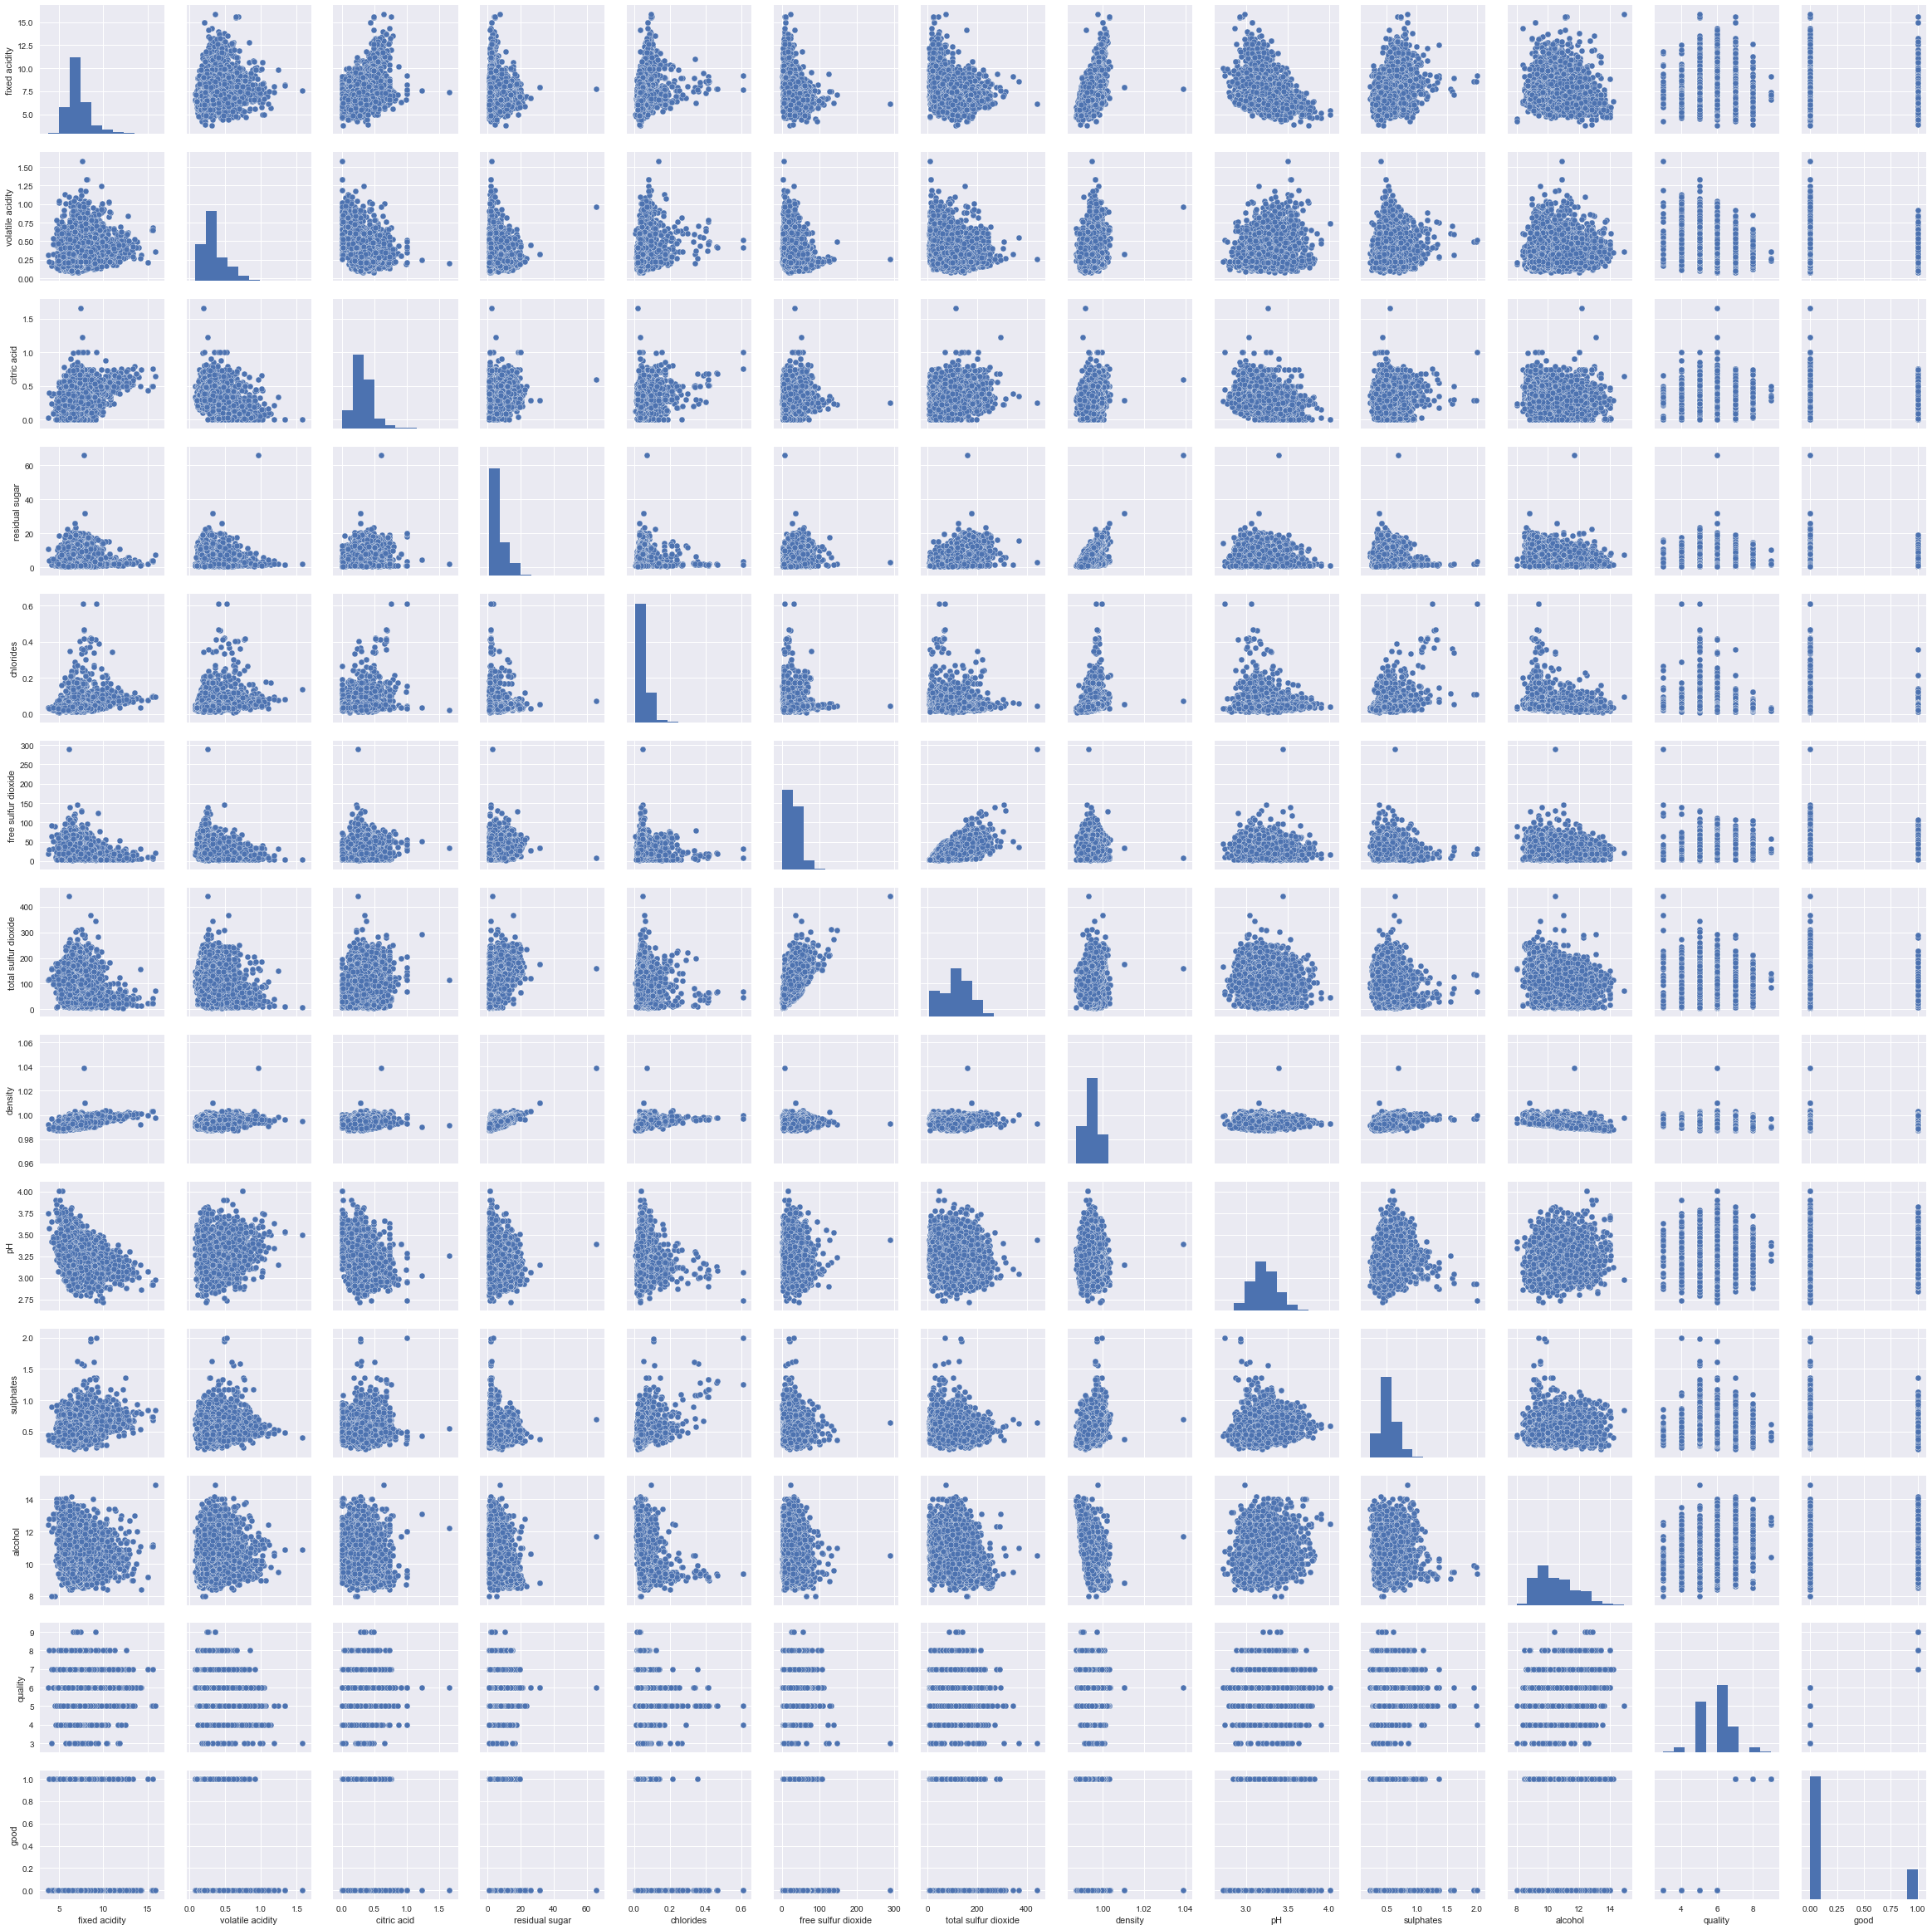

In [90]:
sns.pairplot(data)


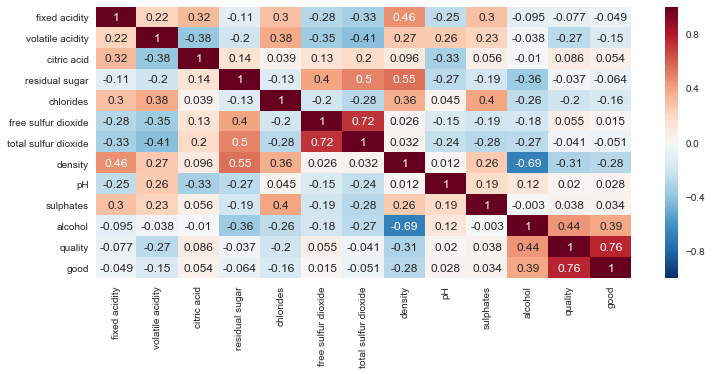

In [91]:
correlation = data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Data Preparation

In [92]:
features = list(set(data.columns)-set(data['quality']))
a = data[features]
b = data['quality']

In [93]:
X = pd.get_dummies(a)
print(X.columns)

Index(['alcohol', 'density', 'pH', 'residual sugar', 'free sulfur dioxide',
       'quality', 'good', 'sulphates', 'volatile acidity',
       'total sulfur dioxide', 'citric acid', 'fixed acidity', 'chlorides',
       'color_red', 'color_white'],
      dtype='object')


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, b, test_size=0.2, random_state=0 )

## Model Building and Evaluation

### 1. Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = regressor.predict(x_test)

### Accuracy Score

In [97]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("Accuracy:",score1)

Accuracy: 0.9569230769230769


### 2. K-Nearest Neighbours

In [98]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [99]:
y_pred1 = classifier.predict(x_test)

### Accuracy Score

In [100]:
from sklearn import metrics
score2 = metrics.accuracy_score(y_test,y_pred1)
print("Accuracy:",score2)

Accuracy: 0.57


### 3. Random Forest


In [101]:
from sklearn.ensemble import RandomForestClassifier
gini_clf1 = RandomForestClassifier(criterion='gini')
gini_clf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
y_pred2 = gini_clf1.predict(x_test)

### Accuracy Score

In [103]:
from sklearn.metrics import accuracy_score
score3 = accuracy_score(y_test, y_pred2)
print("Accuracy:",score3)

Accuracy: 0.9976923076923077


## Best Model Evaluation

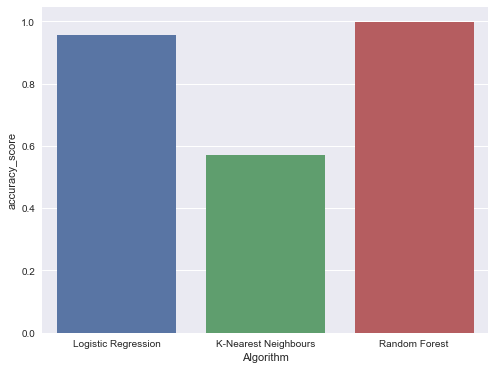

In [104]:
accuracy_list = [score1,score2,score3]
data1 = {'accuracy_score':accuracy_list,
        'Algorithm':["Logistic Regression","K-Nearest Neighbours","Random Forest"]}
df = pd.DataFrame(data1)
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=df.Algorithm, y = df.accuracy_score)
plt.show()

### Conclusion:

To make predictions of wine quality we trained three models. As seen, sklearn's Logistic Regression model , K-nearest neighbour and Random Forest Classifier, the Random Forest Classifier performed marginally better.

 - Name: Muskan
 - Id: 1610991544
 - Batch: AIML-1